In [0]:
import tensorflow as tf

In [0]:
# !pip install tensorflow --upgrade

In [0]:
tf.__version__

'2.1.0'

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
# train_images[0]
import matplotlib.pyplot as plt

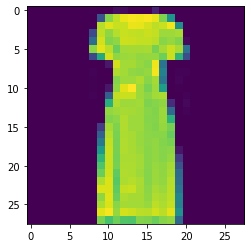

In [0]:
plt.imshow(train_images[50])
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
models = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation=tf.nn.relu),
                            tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
models.compile(optimizer = tf.compat.v1.train.AdamOptimizer(),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [0]:
models.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4972 - accuracy: 0.8250
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3753 - accuracy: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3372 - accuracy: 0.8774
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3131 - accuracy: 0.8843
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2948 - accuracy: 0.8911


In [0]:
models.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3574 - accuracy: 0.8689


[0.3573948856949806, 0.8689]

Example - 2

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train,x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train.shape

(60000, 28, 28)

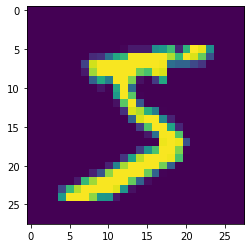

In [0]:
plt.imshow(x_train[0])

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
])

In [0]:
prediction = model(x_train[:1]).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [0]:
prediction

array([[-0.06886416,  0.49128643,  0.1549033 ,  0.03628571, -0.3743636 ,
         0.05210143,  0.74971604,  0.2918973 , -0.03222562,  0.70441276]],
      dtype=float32)

In [0]:
tf.nn.softmax(prediction).numpy()

array([[0.07202636, 0.12611355, 0.09008913, 0.08001243, 0.0530658 ,
        0.08128794, 0.1633038 , 0.10331614, 0.07471424, 0.1560707 ]],
      dtype=float32)

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
loss_fn(y_train[:1],prediction).numpy()

2.5097575

In [0]:
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2958 - accuracy: 0.9136
Epoch 2/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.1423 - accuracy: 0.9574
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1061 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0880 - accuracy: 0.9724
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0758 - accuracy: 0.9765


In [0]:
model.evaluate(x_test,y_test,verbose=2)

10000/10000 - 1s - loss: 0.0761 - accuracy: 0.9770


[0.07606812442499213, 0.977]

In [0]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])

In [0]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.8890986e-08, 7.1795840e-09, 3.8871990e-06, 3.6252888e-05,
        4.8409020e-13, 3.9968807e-08, 2.2796926e-15, 9.9995923e-01,
        3.2363531e-08, 5.7811900e-07],
       [5.7526694e-07, 4.2862106e-05, 9.9994218e-01, 1.3873549e-05,
        7.0252542e-16, 1.0842230e-07, 2.3261101e-08, 2.1992823e-15,
        3.9960753e-07, 1.4442957e-15],
       [2.3270660e-07, 9.9980325e-01, 3.7775040e-05, 2.8019801e-06,
        5.1310863e-06, 9.4306324e-07, 4.7952869e-07, 1.3262859e-04,
        1.6687622e-05, 1.3557589e-07],
       [9.9992192e-01, 2.7454010e-09, 1.8462275e-05, 4.6660244e-07,
        1.7361904e-07, 7.2587846e-07, 7.3040987e-06, 3.5764839e-05,
        2.6380127e-08, 1.5260624e-05],
       [3.7839472e-05, 7.6381902e-08, 2.3688228e-04, 2.9673008e-06,
        9.6932733e-01, 2.8224676e-06, 2.2902108e-05, 1.0819661e-03,
        6.6678376e-06, 2.9280663e-02]], dtype=float32)>